<a href="https://colab.research.google.com/github/Makuo67/QA_Chat_Bot/blob/master/MoneyBot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import random
import json
import torch
import torch.nn as nn
#importing nltk and necessary downloads
from nltk.translate.bleu_score import sentence_bleu
import nltk
nltk.download('punkt')
#Im using porter stemmer here
from nltk.stem.porter import PorterStemmer
from torch.utils.data import Dataset, DataLoader
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data

In [ ]:

intents = pd.read_json("https://raw.githubusercontent.com/gopikasr/Chat-Bot---Financial-digital-Assistant/main/DataChatBot.json")
print(intents.head())

                                             intents
0  {'tag': 'welcome', 'patterns': ['Hi', 'Hello',...
1  {'tag': 'endingnote', 'patterns': ['see you. b...
2  {'tag': 'name', 'patterns': ['whats you name?'...
3  {'tag': 'shopping', 'patterns': ['I would like...
4  {'tag': 'time period', 'patterns': ['till what...


In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

In [ ]:
from torchviz import make_dot,make_dot_from_trace

In [ ]:
def tokenize(sentence):
    return word_tokenize(sentence)

In [ ]:
#using porterstemmer here
stemmer = PorterStemmer()
def stem(word):
    return stemmer.stem(word.lower())

In [ ]:
def BagOfWords(tokenized_sentence, words):
    sentence_words = [stem(word) for word in tokenized_sentence]
    Bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in sentence_words:
            Bag[idx] = 1
    return Bag


In [ ]:
#checking whether this is working or not
sentence=["hi","im","gopika","hello"]
words=["hi","how","are","you"]
BagOfWords(sentence,words)

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
#for collecting all the words, lets create an empty list
all_the_words = []
#for collecting all the tags
tags = []
#the below pair list which will be  made filled with both patterns and their tags
pair = []
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    tag = intent['tag']
    # adding this to tag list
    tags.append(tag)
    for pattern in intent['patterns']:
        # tokenizing each word in the sentence
        w = tokenize(pattern)
        # addding to our words list(since w is an array we need to use extend for adding the elements)
        all_the_words.extend(w)
        # add to pair
        pair.append((w, tag))

# stem and lower each word. So, first excluding punctuation marks
ignore_words = ['?', '.', '!',',']
all_the_words = [stem(w) for w in all_the_words if w not in ignore_words]
# remove duplicates and sort
all_the_words = sorted(set(all_the_words))
tags = sorted(set(tags))

print(len(pair), "patterns")
print(len(tags), "tags:", tags)
print(len(all_the_words), "unique stemmed words:", all_the_words)


298 patterns
47 tags: ['Asset allocation', 'AsymmetricInformation', 'Balance sheet', 'Bank Run', 'Bank capital', 'Bank reserves', 'Bargain offer', 'Bond market', 'Capital market', 'Capital ratio', 'Compound interest', 'Credit risk', 'Crowdfunding', 'Demonetisation', 'FICO score', 'Financial crisis', 'Monetary stability', 'Moral hazard', 'Net Worth', 'PRA', 'Ring Fence', 'Term life insurance', 'Thank you', 'VAR', 'bail-out', 'bank', 'bank assests', 'bitcoin', 'cryptocurrency', 'deliveryoption', 'endingnote', 'leverage', 'liquidity', 'liquidity trap', 'location', 'name', 'narrow money', 'nominal interest rate', 'passporting', 'payments', 'price of a saree', 'price of formal wear', 'real interest rate', 'shopping', 'time period', 'todaysOffers', 'welcome']
209 unique stemmed words: ["'s", '2016', '`', 'a', 'about', 'accept', 'address', 'again', 'all', 'alloc', 'an', 'and', 'ani', 'are', 'asset', 'asymmetr', 'at', 'author', 'averag', 'bail-out', 'bailout', 'balanc', 'bank', 'bargain', 'be'

In [ ]:
# create training data
X_train = []
y_train = []
#using a tuple to run through the pair
for (pattern_sentence, tag) in pair:
    # X-->is the bag of words for each pattern_sentence
    bag = BagOfWords(pattern_sentence, all_the_words)
    X_train.append(bag)
    # y: PyTorch CrossEntropyLoss needs only class labels, not one-hot.so defining label
    label = tags.index(tag)
    y_train.append(label)
#array
X_train = np.array(X_train)
y_train = np.array(y_train)

# Hyper-parameters are--->
num_epochs = 1000
batch_size = 8
learning_rate = 0.001
#len(X_train[0]) means the length of 1st bag of words because they all have the same size.
#if we want we can just print and check. But its clear here.
input_size = len(X_train[0])
hidden_size = 8
output_size = len(tags)
#lets print the values
print("inputsize=",input_size)
print("outputsize=",output_size)

inputsize= 209
outputsize= 47


In [ ]:
#traning dataset
class ChatDataset(Dataset):
#implementing init function
    def __init__(self):
      #storing the values
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples



In [ ]:
#creating a new class for our neural network
class NeuralNetModel(nn.Module):
  #This will be a feed forward neural network with two hidden layer
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetModel, self).__init__()
        #creating the firstlinear layer. This gets the input size and then the connected hiddenlayer
        self.linearlayer1 = nn.Linear(input_size, hidden_size)
        #applying batch normalization
        self.bn1= nn.BatchNorm1d(hidden_size)
        #creating the 1st hidden layer with input size as hiddensize and output size as the hidden size
        self.linearlayer2 = nn.Linear(hidden_size, hidden_size)
        self.bn2= nn.BatchNorm1d(hidden_size)
        #creating the 2nd hidden layer with input size as hiddensize and output size as the num classes
        self.linearlayer3 = nn.Linear(hidden_size, num_classes)
        #using relu activation function
        self.relu = nn.ReLU()
    #implementing the forward pass
    def forward(self, x):
      #apply our first linear layer which gets x as input and then gives out the output
        output = self.linearlayer1(x)
        #activation function
        output = self.relu(output)
      #apply our first linear layer which gets output as input and then gives out the next output
        output = self.linearlayer2(output)
        #activation function
        output = self.relu(output)
        output = self.linearlayer3(output)
        return output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNetModel(input_size, hidden_size, output_size).to(device)

model.to(device)

# Create input tensor and move it to the same device as the model
x = torch.randn(47, 209).to(device)

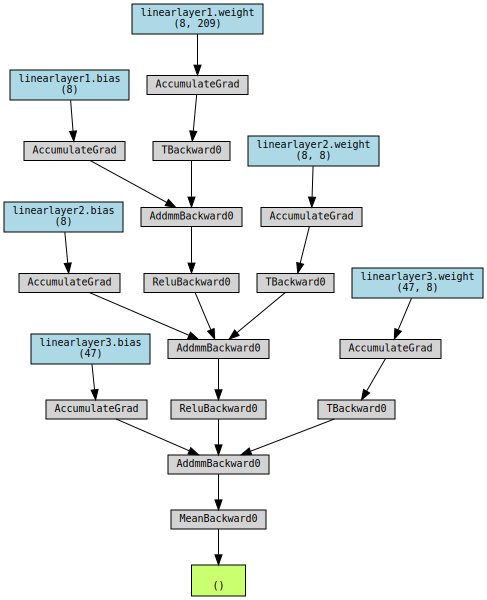

In [ ]:

y=model(x)
make_dot(y.mean(),params=dict(model.named_parameters()))

In [ ]:
#counting the no of parameters it have.
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

2207

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
#the training dataset, we have defined earlier.
dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)
#suppose if Gpu is available, we can puish our model to the device. otherwise we can have in cpu itself
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralNetModel(input_size, hidden_size, output_size).to(device)

# Loss is CrossEntropyLoss and optimizer is Adam
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
total=0
correct=0

all_labels = []
all_preds = []

# Train the model
for epoch in range(num_epochs):
    total = 0
    correct = 0
    all_labels = []
    all_preds = []

    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)

        # Forward pass
        outputs = model(words)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        _, pred = outputs.max(1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(pred.cpu().numpy())

    if (epoch+1) % 10 == 0:
        accuracy = correct / total * 100
        precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
        recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
        f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        print(f'Accuracy: {accuracy:.2f}%')
        print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')

accuracy = correct / total * 100
precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f'Final Accuracy: {accuracy:.2f}%')
print(f'Final Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}')
print(f'Final Loss: {loss.item():.4f}')

data = {
"model_state": model.state_dict(),
"input_size": input_size,
"hidden_size": hidden_size,
"output_size": output_size,
"all_words": all_the_words,
"tags": tags
}
#storing these  in a file, this will serialise it and save it to that file named DATA.pth.
FILE = "DATA.pth"
torch.save(data, FILE)

print(f'training complete. file saved to {FILE}')

Epoch [10/1000], Loss: 3.4319
Accuracy: 10.40%
Precision: 0.0198, Recall: 0.0871, F1-score: 0.0304
Epoch [20/1000], Loss: 2.1054
Accuracy: 36.91%
Precision: 0.2795, Recall: 0.3463, F1-score: 0.2692
Epoch [30/1000], Loss: 1.0692
Accuracy: 74.50%
Precision: 0.6806, Recall: 0.7035, F1-score: 0.6545
Epoch [40/1000], Loss: 0.3878
Accuracy: 95.97%
Precision: 0.9706, Recall: 0.9584, F1-score: 0.9546
Epoch [50/1000], Loss: 0.6230
Accuracy: 97.32%
Precision: 0.9814, Recall: 0.9728, F1-score: 0.9691
Epoch [60/1000], Loss: 0.0678
Accuracy: 97.99%
Precision: 0.9814, Recall: 0.9792, F1-score: 0.9784
Epoch [70/1000], Loss: 0.5912
Accuracy: 97.99%
Precision: 0.9881, Recall: 0.9787, F1-score: 0.9756
Epoch [80/1000], Loss: 0.0808
Accuracy: 98.32%
Precision: 0.9911, Recall: 0.9823, F1-score: 0.9792
Epoch [90/1000], Loss: 0.1124
Accuracy: 97.65%
Precision: 0.9752, Recall: 0.9762, F1-score: 0.9747
Epoch [100/1000], Loss: 0.0185
Accuracy: 98.32%
Precision: 0.9835, Recall: 0.9833, F1-score: 0.9832
Epoch [11

In [ ]:
# Calculate overall metrics
accuracy = float(correct) / total * 100
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Final Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Final Accuracy: 98.32%
Precision: 0.99
Recall: 0.98
F1-Score: 0.98


In [ ]:
# BLEU score calculation
def get_reference_response(input_text):
    for intent in intents['intents']:
        if input_text in intent['patterns']:
            return intent['responses'][0]
    return ""

# Example validation set
validation_set = [
    "How are you", "what is passporting","What is Net Worth",
    "Are you a chatbot","what do you mean by Bank reserves", "what are bank assets", "what is cryptocurrency", "what is liquidity?","what is liquidity trap?","what is mean by narrow money?",
    "Tell me your name","Do you know about bail-out in financial markets", "Tell me about bailout", "What does critics and supporter say about bail-out",
    "can you recommend me something from here","How much time it will take for delivery", "When will this site close?", "When are you people open", "When will this store be open?",
]

# Generate predictions on the validation set
references = []
hypotheses = []

for input_text in validation_set:
    reference_response = get_reference_response(input_text)
    references.append([reference_response])

    # Generate response using your model
    model_input = BagOfWords(tokenize(input_text), all_the_words)
    model_input = torch.tensor(model_input).unsqueeze(0).to(device)  # Add batch dimension
    output = model(model_input)
    _, predicted_label = output.max(1)
    predicted_tag = tags[predicted_label.item()]
    predicted_response = [intent['responses'][0] for intent in intents['intents'] if intent['tag'] == predicted_tag][0]
    hypotheses.append(predicted_response)

# Tokenize references and hypotheses for BLEU calculation
references_tokenized = [[tokenize(ref[0])] for ref in references]
hypotheses_tokenized = [tokenize(hyp) for hyp in hypotheses]

# Calculate BLEU score
bleu_scores = [sentence_bleu(ref, hyp) for ref, hyp in zip(references_tokenized, hypotheses_tokenized)]
average_bleu_score = sum(bleu_scores) / len(bleu_scores)

print(f'Final BLEU score: {average_bleu_score:.4f}')

Final BLEU score: 0.8947


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
#loading the data we saved before
FILE = "DATA.pth"
data = torch.load(FILE)

#defining values
input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
all_the_words = data['all_words']
tags = data['tags']
model_state = data["model_state"]

#lets print the model now.
model = NeuralNetModel(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

NeuralNetModel(
  (linearlayer1): Linear(in_features=209, out_features=8, bias=True)
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linearlayer2): Linear(in_features=8, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linearlayer3): Linear(in_features=8, out_features=47, bias=True)
  (relu): ReLU()
)

In [ ]:
import random
def bargain(value):
    # tokenize a sentence to tokens
    tokens = nltk.word_tokenize(value)
    #tagging will help top understand at what category it belong to.
    #for eg: walk is a verb phrase,one is a cardinal digit
    tagged = nltk.pos_tag(tokens)
    bot_name="FinBot"
    # tree representation
    entities = nltk.chunk.ne_chunk(tagged)
#defining the numbers to the str values
    numbers = {"1": 1, "2": 2, "3": 3, "4": 4, "5": 5, "6": 6, "7": 7, "8": 8, "9": 9, "10" : 10,"11": 11,"12": 12,"13": 13,"14": 14,"15": 15,"16": 16,"17": 17,"18": 18,"19": 19,"20": 20,"21": 21,"22": 22,"23": 23,"24": 24,"25": 25,"26": 26,"27": 27,"28": 28,"29":29,"30": 30}
    OptionsToReply=["Sorry, this is of latest fashion, Can you raise the amount a little bit","This is a very special thing, we can't give you at this much less cost","Oh no sorry. Please raise a little bit"]
    for word, wordType in entities:
        word = stemmer.stem(word)
#             print (word, wordType)
        if (wordType in ['CD'] and word in numbers):
               if numbers[word] >20:
                 print("FinBot:Yes agreed! Now,you can buy the ribbon at this price")
               elif numbers[word] <=20:
                 print(f"{bot_name}: {random.choice(OptionsToReply)}")
               else:
                  break

In [ ]:
bargain('15')

FinBot: This is a very special thing, we can't give you at this much less cost


In [ ]:
 bot_name = "MoneyBot"
#for taking the input
name=input("Enter Your Name: ")
print("FinBot:Hey, Let's chat! (type 'quit' to exit)Also when you start bargaining give digits")
while True:
  #once the person types his name, then from the next chat onwards the name will be shown
    sent=input(name+':')
    if sent == "quit":
        break
    #since im going to offer bargaining offer for only one product and its rated price is 30 Rs.
    #However the person will tell only numbers ranging from 1 to 30
    if sent in ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30"]:
       bargain(sent)
    else:
        sent = tokenize(sent)
        X = BagOfWords(sent, all_the_words)
        X = X.reshape(1, X.shape[0])
        X = torch.from_numpy(X).to(device)

        output = model(X)
        _, predicted = torch.max(output, dim=1)

        tag = tags[predicted.item()]

        probs = torch.softmax(output, dim=1)
        prob = probs[0][predicted.item()]
        if prob.item() > 0.75:
            for intent in intents['intents']:
                if tag == intent["tag"]:
                    print(f"{bot_name}: {random.choice(intent['responses'])}")
        else:
            print(f"{bot_name}: I do not understand...")

Enter Your Name: Okeke
FinBot:Hey, Let's chat! (type 'quit' to exit)Also when you start bargaining give digits
Okeke:what is a bank?
MoneyBot: A bank in simple terms is a business that makes its profit by paying interest to those who keep money there and charging a higher rate of interest to people/businesses who borrow money from the bank
Okeke:what is cryptocurrency?
MoneyBot: A cryptocurrency is a digital or virtual currency that uses cryptography and is difficult to counterfeit because of this security feature.
Okeke:quit
